In [ ]:
import pandas as pd
import numpy as np

import os
from pathlib import Path

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
DATA_DIR = Path('data')
df_train_all = pd.read_parquet(DATA_DIR.joinpath('train_features.parquet'))

In [10]:
df_train = df_train_all.drop(columns=["time_id", "stock_id", "row_id"]).copy()
df_train

spread_ratio_mean  spread_ratio_std  volume_imbalance  rvol_0_0.2_1  \
0                8.522233          2.115166        134.894040      0.001141   
1                3.942811          1.572313        142.050000      0.001013   
2                7.254260          1.636399        141.414894      0.000622   
3                8.608392          2.802506        146.216667      0.001037   
4                3.972501          1.300607        123.846591      0.000718   
...                   ...               ...               ...           ...   
428927           8.783802          2.352351        161.638710      0.000957   
428928           7.058147          2.279731        150.578475      0.000981   
428929           7.392257          2.399711        254.406250      0.001371   
428930           5.301715          1.718243        145.654135      0.000983   
428931           4.318035          1.253924        177.442396      0.000550   

        rvol_0_0.2_3  rvol_0_0.2_5  rvol_0_0.6_1  rvol_0_0.6_3  rvol_0_0.6_5  \
0           0.002906      0.004391      0.002651      0.005089      0.006629   
1           0.002489      0.003464      0.001204      0.002011      0.002148   
2           0.001629      0.002526      0.001356      0.002629      0.003570   
3           0.002614      0.003759      0.001764      0.003556      0.004645   
4           0.001767      0.002465      0.001238      0.002352      0.002963   
...              ...           ...           ...           ...           ...   
428927      0.002344      0.003396      0.002232      0.004236      0.005424   
428928      0.002330      0.003395      0.002312      0.004043      0.005178   
428929      0.003340      0.004678      0.002179      0.003865      0.004649   
428930      0.002440      0.003596      0.002229      0.004270      0.005619   
428931      0.001358      0.002012      0.001227      0.002232      0.002939   

        rvol_0_1_1  ...  rvol_0.15_0.2_5  rvol_0.15_0.6_1  rvol_0.15_0.6_3  \
0         0.004499  ...         0.004236         0.002365         0.004688   
1         0.001204  ...         0.003385         0.001144         0.001892   
2         0.002369  ...         0.002482         0.001245         0.002450   
3         0.002574  ...         0.003655         0.001701         0.003452   
4         0.001894  ...         0.002347         0.001144         0.002140   
...            ...  ...              ...              ...              ...   
428927    0.003691  ...         0.003213         0.001963         0.003852   
428928    0.004104  ...         0.003326         0.002089         0.003764   
428929    0.003117  ...         0.004679         0.002109         0.003668   
428930    0.003661  ...         0.003556         0.002048         0.004083   
428931    0.002092  ...         0.001935         0.001149         0.002158   

        rvol_0.15_0.6_5  rvol_0.15_1_1  rvol_0.15_1_3  rvol_0.15_1_5  \
0              0.006222       0.003942       0.005861       0.007139   
1              0.002001       0.001020       0.001454       0.001489   
2              0.003421       0.002165       0.003070       0.003893   
3              0.004520       0.002463       0.004044       0.004972   
4              0.002689       0.001692       0.002420       0.002888   
...                 ...            ...            ...            ...   
428927         0.004991       0.003188       0.004795       0.005820   
428928         0.004859       0.003622       0.004824       0.005783   
428929         0.004424       0.002990       0.004149       0.004785   
428930         0.005462       0.003281       0.004994       0.006290   
428931         0.002810       0.001908       0.002701       0.003324   

        trade_volume  trade_count    target  
0             3179.0        110.0  0.004136  
1             1289.0         57.0  0.001445  
2             2161.0         68.0  0.002168  
3             1962.0         59.0  0.002195  
4             1791.0         89.0  0.001747  
...              ...

In [13]:
fig = px.histogram(df_train, x="target", nbins=100, title='Realised Volatility Target distribution')
fig.show()

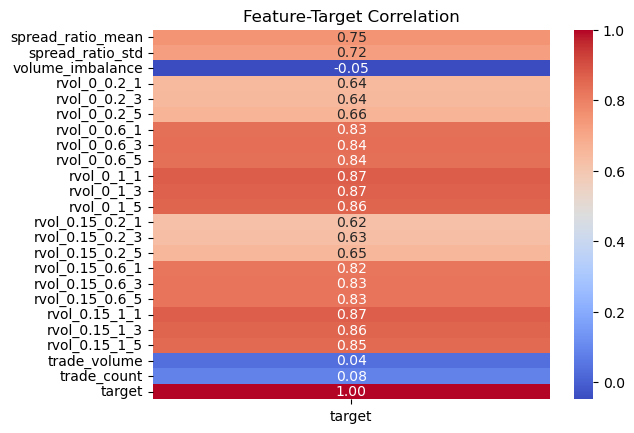

In [24]:
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix[["target"]], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature-Target Correlation')
plt.show()